In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, MFDataset
import xarray as xr
import pandas as pd
from scipy import spatial
from datetime import datetime
from datetime import timedelta

In [2]:
### MOSAiC Summer School
# Code by Thomas Rackow (AWI, YOPP) for 'climatological' sea ice buoy forecasts.
# Extend to a real forecast by using whatever U,V forecasts will be available on the ship.
# (c) 2019

In [3]:
# based on Thomas K. favourites; 1) Low Resolution Sea Ice Drift
# ftp://osisaf.met.no/archive/ice/drift_lr/

In [4]:
# and 2) AMSR-2 Global Sea Ice Concentration
# ftp://osisaf.met.no/prod/ice/conc_amsr/

### download data: sea ice drift velocities and concentration

In [191]:
# download latest drift velocities into folder 'drift-velocities'
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P drift-velocities ftp://osisaf.met.no/archive/ice/drift_lr/merged/

2019-09-07 18:20:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/ [801] -> "drift-velocities-new/archive/ice/drift_lr/merged/.listing" [1]
2019-09-07 18:20:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/ [179] -> "drift-velocities-new/archive/ice/drift_lr/merged/2009/.listing" [1]
2019-09-07 18:20:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/12/ [3023] -> "drift-velocities-new/archive/ice/drift_lr/merged/2009/12/.listing" [1]
2019-09-07 18:20:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/12/ice_drift_nh_polstere-625_multi-oi_200912061200-200912081200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2009/12/ice_drift_nh_polstere-625_multi-oi_200912061200-200912081200.nc" [1]
2019-09-07 18:20:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/12/ice_drift_nh_polstere-625_multi-oi_200912071200-200912091200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2009/12/ice_drift_nh_polstere-625_multi-o

2019-09-07 18:20:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001021200-201001041200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001021200-201001041200.nc" [1]
2019-09-07 18:20:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001031200-201001051200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001031200-201001051200.nc" [1]
2019-09-07 18:20:33 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001041200-201001061200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001041200-201001061200.nc" [1]
2019-09-07 18:20:35 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001051200-201001071200.nc [72

2019-09-07 18:21:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201001311200-201002021200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201001311200-201002021200.nc" [1]
2019-09-07 18:21:04 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002011200-201002031200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002011200-201002031200.nc" [1]
2019-09-07 18:21:05 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002021200-201002041200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002021200-201002041200.nc" [1]
2019-09-07 18:21:06 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002031200-201002051200.nc [72

2019-09-07 18:21:36 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003011200-201003031200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003011200-201003031200.nc" [1]
2019-09-07 18:21:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003021200-201003041200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003021200-201003041200.nc" [1]
2019-09-07 18:21:38 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003031200-201003051200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003031200-201003051200.nc" [1]
2019-09-07 18:21:39 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003041200-201003061200.nc [72

2019-09-07 18:22:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/04/ [3749] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/04/.listing" [1]
2019-09-07 18:22:11 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201003301200-201004011200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201003301200-201004011200.nc" [1]
2019-09-07 18:22:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201003311200-201004021200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201003311200-201004021200.nc" [1]
2019-09-07 18:22:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201004011200-201004031200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201004011200-20100

2019-09-07 18:22:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201004281200-201004301200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201004281200-201004301200.nc" [1]
2019-09-07 18:22:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/05/ [3870] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/05/.listing" [1]
2019-09-07 18:22:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201004291200-201005011200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201004291200-201005011200.nc" [1]
2019-09-07 18:22:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201004301200-201005021200.nc [724888] -> "drift-velocities-new/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201004301200-20100

In [22]:
# download sea ice concentration into folder 'seaice-concentration'
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P seaice-concentration ftp://osisaf.met.no/prod/ice/conc_amsr/

2019-07-12 14:12:28 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ [14111] -> "seaice-concentration/prod/ice/conc_amsr/.listing" [1]
2019-07-12 14:12:37 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906091200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906091200.nc" [1]
2019-07-12 14:13:02 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906101200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906101200.nc" [1]
2019-07-12 14:13:24 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906111200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906111200.nc" [1]
2019-07-12 14:13:35 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906121200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-

2019-07-12 17:46:28 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906121200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906121200.nc" [1]
2019-07-12 17:46:37 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906131200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906131200.nc" [1]
2019-07-12 17:46:46 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906141200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906141200.nc" [1]
2019-07-12 17:46:55 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906151200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906151200.nc" [1]
2019-07-12 17:47:04 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906161200.nc [20450448] -> "se

2019-07-12 17:53:31 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906171200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906171200.nc" [1]
2019-07-12 17:53:38 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906181200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906181200.nc" [1]
2019-07-12 17:53:45 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906191200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906191200.nc" [1]
2019-07-12 17:53:53 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906201200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906201200.nc" [1]
2019-07-12 17:54:00 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-t

2019-07-12 17:57:55 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906211200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906211200.nc" [1]
2019-07-12 17:58:03 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906221200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906221200.nc" [1]
2019-07-12 17:58:10 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906231200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906231200.nc" [1]
2019-07-12 17:58:17 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906241200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906241200.nc" [1]
2019-07-12 17:58:24 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906251200.nc [15756368] -> "se

In [11]:
ls seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201907111200.nc

seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201907111200.nc


In [13]:
!ncdump -h seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201907111200.nc

netcdf ice_conc_nh_polstere-100_amsr2_201907111200 {
dimensions:
	time = 1 ;
	nv = 2 ;
	xc = 760 ;
	yc = 1120 ;
variables:
	int Polar_Stereographic_Grid ;
		Polar_Stereographic_Grid:grid_mapping_name = "polar_stereographic" ;
		Polar_Stereographic_Grid:false_easting = 0. ;
		Polar_Stereographic_Grid:false_northing = 0. ;
		Polar_Stereographic_Grid:semi_major_axis = 6378273. ;
		Polar_Stereographic_Grid:semi_minor_axis = 6356889.44891 ;
		Polar_Stereographic_Grid:straight_vertical_longitude_from_pole = -45. ;
		Polar_Stereographic_Grid:latitude_of_projection_origin = 90. ;
		Polar_Stereographic_Grid:standard_parallel = 70. ;
		Polar_Stereographic_Grid:proj4_string = "+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45" ;
	double time(time) ;
		time:axis = "T" ;
		time:long_name = "reference time of product" ;
		time:standard_name = "time" ;
		time:units = "seconds since 1978-01-01 00:00:00" ;
		time:calendar = "standard" ;
		time:bounds = "time_bnds" ;
	double time_b

In [4]:
!ncdump -h drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201906291200-201907011200.nc

netcdf ice_drift_nh_polstere-625_multi-oi_201906291200-201907011200 {
dimensions:
	time = 1 ;
	nv = 2 ;
	xc = 119 ;
	yc = 177 ;
variables:
	int Polar_Stereographic_Grid ;
		Polar_Stereographic_Grid:grid_mapping_name = "polar_stereographic" ;
		Polar_Stereographic_Grid:straight_vertical_longitude_from_pole = -45.f ;
		Polar_Stereographic_Grid:latitude_of_projection_origin = 90.f ;
		Polar_Stereographic_Grid:standard_parallel = 70.f ;
		Polar_Stereographic_Grid:false_easting = 0.f ;
		Polar_Stereographic_Grid:false_northing = 0.f ;
		Polar_Stereographic_Grid:semi_major_axis = 6378273.f ;
		Polar_Stereographic_Grid:semi_minor_axis = 6356890.f ;
		Polar_Stereographic_Grid:proj4_string = "+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45" ;
	double time(time) ;
		time:axis = "T" ;
		time:long_name = "reference time of product" ;
		time:standard_name = "time" ;
		time:units = "seconds since 1978-01-01 00:00:00" ;
		time:calendar = "standard" ;
		time:bounds = "time_bnds

### look at the data

In [5]:
!ncdump -h drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909041200-201909061200.nc

netcdf ice_drift_nh_polstere-625_multi-oi_201909041200-201909061200 {
dimensions:
	time = 1 ;
	nv = 2 ;
	xc = 119 ;
	yc = 177 ;
variables:
	int Polar_Stereographic_Grid ;
		Polar_Stereographic_Grid:grid_mapping_name = "polar_stereographic" ;
		Polar_Stereographic_Grid:straight_vertical_longitude_from_pole = -45.f ;
		Polar_Stereographic_Grid:latitude_of_projection_origin = 90.f ;
		Polar_Stereographic_Grid:standard_parallel = 70.f ;
		Polar_Stereographic_Grid:false_easting = 0.f ;
		Polar_Stereographic_Grid:false_northing = 0.f ;
		Polar_Stereographic_Grid:semi_major_axis = 6378273.f ;
		Polar_Stereographic_Grid:semi_minor_axis = 6356890.f ;
		Polar_Stereographic_Grid:proj4_string = "+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45" ;
	double time(time) ;
		time:axis = "T" ;
		time:long_name = "reference time of product" ;
		time:standard_name = "time" ;
		time:units = "seconds since 1978-01-01 00:00:00" ;
		time:calendar = "standard" ;
		time:bounds = "time_bnds

In [6]:
# load an example file
OSISAFfile = 'drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909041200-201909061200.nc'
fl = Dataset(OSISAFfile)
#xc=fl.variables['xc']
#yc=fl.variables['yc']
#XC,YC=np.meshgrid(xc,yc)

In [7]:
# lon lat on grid
lon_start=np.copy(fl.variables['lon'])
lat_start=np.copy(fl.variables['lat'])

# lon lat at the end of the displacement
lon_end=np.squeeze(fl.variables['lon1'][0,:,:])
lat_end=np.squeeze(fl.variables['lat1'][0,:,:])

In [8]:
lon_end.min(), lon_end.max(), lon_start.min(), lon_start.max()

(-179.70926, 179.05727, -180.0, 179.52649)

In [9]:
r_earth=6.3675*10**6 # radius of Earth in [m]
rad=np.pi/180.0 # radiant <-> degree

def length_of_latitude_circle(lat=85.):
    return 2*np.pi*r_earth*np.cos(lat*rad) / 1000. # km

In [10]:
# Construct U,V sea ice velocity here for plotting
deltalon=lon_end-lon_start
deltalon[deltalon>100.]=deltalon[deltalon>100.]-360. # jump at -180..180
deltalon[deltalon<-100.]=deltalon[deltalon<-100.]+360. # jump at -180..180
Ufield=deltalon/48. *length_of_latitude_circle(lat=lat_start[:,:])/360. * 3.6 # km/h -> m/s
Vfield=(lat_end-lat_start)/48. *length_of_latitude_circle(lat=0.)/360. * 3.6 #km/h -> m/s
plotfield=np.squeeze(np.sqrt(Ufield**2 + Vfield**2)) # m/s
#plotfield=Ufield

/Users/trackow/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


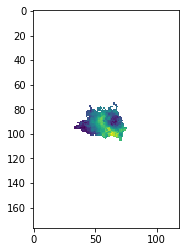

In [11]:
np.size(plotfield)
plt.imshow(plotfield)
plt.show()

#### add geographic information with Basemap

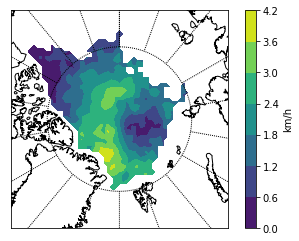

In [12]:
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l')
#m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()
#m.fillcontinents(color='0.1',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='lightblue')

lon_map,lat_map=m(lon_start[:,:],lat_start[:,:])
im=m.contourf(lon_map,lat_map,plotfield)

cbar=plt.colorbar()
cbar.set_label('km/h')

plt.show()

### load an example concentration file

In [14]:
# load an example file
AMSR2file = 'seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201907111200.nc'
fl = Dataset(OSISAFfile)
#xc=fl.variables['xc']
#yc=fl.variables['yc']
#XC,YC=np.meshgrid(xc,yc)
fl.close()

### Compute forward trajectories; class Buoys

In [15]:
class Buoys:
    
    global rad, r_earth
    rad=np.pi/180.0 # radiant <-> degree
    r_earth=6.3675*10**6 # radius of Earth in [m]
    
    def __init__(self, lon_start, lat_start, earliest_date_of_buoy, start_advect_date):
        self.oldlon = lon_start*rad
        self.oldlat = lat_start*rad
        self.lon = lon_start*rad
        self.lat = lat_start*rad
        self.initlon = lon_start*rad
        self.initlat = lat_start*rad
        self.old_u = np.zeros(lon_start.shape)
        self.old_v = np.zeros(lon_start.shape)
        self.date = datetime.strptime(earliest_date_of_buoy, "%Y-%m-%d %H:%M:%S")
        self.startdates = start_advect_date
        #self.delta_x = np.zeros(lon_start.shape)
        #self.delta_y = np.zeros(lon_start.shape)
        #self.u_ice = np.zeros(lon_start.shape)
        #self.v_ice = np.zeros(lon_start.shape)
        
    def getdate(self):
        return self.date.strftime("%Y-%m-%d %H:%M:%S")
        
    def trajectory(self, new_u,new_v, delta_t):
        print("Update buoy positions. Integrate for " + str(delta_t/3600.) + " hours.")
        
        #save old position in case the drifter leaves the domain
        self.oldlon = self.lon # radiant
        self.oldlat = self.lat # radiant
        
        #displacement vectors
        deltax1 = self.old_u * delta_t
        deltay1 = self.old_v * delta_t
        deltax2 = new_u * delta_t
        deltay2 = new_v * delta_t
        
        #Heun method (2nd order)
        self.lon = self.lon + (0.5*(deltax1 + deltax2) / (r_earth*np.cos(self.lat)) )
        self.lat = self.lat + (0.5*(deltay1 + deltay2) /  r_earth )
        
        # keep degree in range 0..360 and -90..90
        lon_deg=self.lon/rad % 360
        lat_deg=np.clip(self.lat/rad, -90., 90.)
        self.lon = lon_deg*rad
        self.lat = lat_deg*rad
        
        #update velocity here (old value was needed for heun method)
        self.old_u=new_u
        self.old_v=new_v
        
        # set positions to NaN before the buoy is supposed to move
        idx=getindices_beforestart(self.getdate(), self.startdates)
        lon_deg[idx] = np.nan
        lat_deg[idx] = np.nan
        self.lon[idx] = self.initlon[idx]
        self.lat[idx] = self.initlat[idx]
        self.old_u[idx]=0.
        self.old_v[idx]=0.
        
        # update time stamp
        self.date = self.date + timedelta(seconds=delta_t)

        return lon_deg, lat_deg


In [16]:
def getindices_beforestart(currentdate, startdates):
        
    indices=np.zeros(np.shape(start_dates),dtype='bool')
    for i,val in enumerate(startdates):
        # don't advect yet
        if currentdate < startdates[i]:
            indices[i]=True
            
    return indices

In [17]:
def loaddate_ofOSISAF(datestring, hemisphere='nh'):
    
    # convert datestring to datetime object
    thedate = datetime.strptime(datestring, "%Y-%m-%d %H:%M:%S")
    
    # let's construct the file name, 
    # e.g. drift-velocities/archive/ice/drift_lr/merged/2019/09/
    # ice_drift_nh_polstere-625_multi-oi_201909011200-201909031200.nc
    pathtofile="drift-velocities/archive/ice/drift_lr/merged/"
    # middle part
    middlefilename="ice_drift_"+hemisphere+"_polstere-625_multi-oi_"
    # e.g. 201907291200-201907311200 (48hr span)
    enddate=thedate + timedelta(days=2)
    # YYYY/MM/ (from end date)
    YYYYMM=enddate.strftime("%Y")+"/"+enddate.strftime("%m")+"/"
    endfilename= thedate.strftime("%Y%m%d%H%M") + "-" + enddate.strftime("%Y%m%d%H%M") + '.nc'
    
    # the OSISAF file to be loaded
    filename=pathtofile + YYYYMM + middlefilename + endfilename
    print "loading "+filename+ " ..."
    
    # load the file
    fl = Dataset(filename)
    #xc=fl.variables['xc']
    #yc=fl.variables['yc']
    #XC,YC=np.meshgrid(xc,yc)
    
    # lon lat on grid
    lon_start=np.copy(fl.variables['lon'])
    lat_start=np.copy(fl.variables['lat'])

    # lon lat at the end of the displacement
    lon_end=np.squeeze(fl.variables['lon1'][0,:,:])
    lat_end=np.squeeze(fl.variables['lat1'][0,:,:])
    
    # close the file
    fl.close()
    
    # compute Ufield from end points and start points (48hour change)
    deltalon=lon_end-lon_start
    deltalon[deltalon>100.]=deltalon[deltalon>100.]-360.   # jump at -180..180
    deltalon[deltalon<-100.]=deltalon[deltalon<-100.]+360. # jump at -180..180
    Ufield=deltalon/48. *length_of_latitude_circle(lat=lat_start[:,:])/360. / 3.6 # km/h -> m/s
    
    # compute Vfield as well
    Vfield=(lat_end-lat_start)/48. *length_of_latitude_circle(lat=0.)/360. / 3.6 #km/h -> m/s
    
    return Ufield, Vfield

In [18]:
# test
datestring='2019-09-01 12:00:00'
Ufield, Vfield = loaddate_ofOSISAF(datestring, hemisphere='nh')

loading drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909011200-201909031200.nc ...


In [19]:
def find_UV_atbuoy_pos(lon_start,lat_start, Ufield,Vfield, objects):
    
    # (lon,lat) tuples of the underlying grid
    A=np.array([lon_start[:,:].flatten(), lat_start[:,:].flatten()]).T # -180..180 assumed in OSISAF
    # change to -180..180 as assumed in OSISAF data; in the trajectory code its 0..360
    lon_adjust=objects.lon/rad
    lon_adjust[lon_adjust>180.]=lon_adjust[lon_adjust>180.]-360.
    # zip buoy (lon & lat) arrays to (lon,lat) tuples
    tuples = np.column_stack((lon_adjust,objects.lat/rad)) 
    # fast KDTree nearest neighbor method
    idx=spatial.KDTree(A).query(tuples)[1]
    
    return Ufield[idx], Vfield[idx]

In [20]:
def find_idx_atbuoy_pos(lon_start,lat_start, poslon, poslat):
    
    # (lon,lat) tuples of the underlying grid
    A=np.array([lon_start[:,:].flatten(), lat_start[:,:].flatten()]).T # -180..180 assumed in OSISAF
    # change to -180..180 as assumed in OSISAF data; poslon is 0..360
    lon_adjust=poslon
    lon_adjust[lon_adjust>180.]=lon_adjust[lon_adjust>180.]-360.
    # zip buoy (lon & lat) arrays to (lon,lat) tuples
    tuples = np.column_stack((lon_adjust,poslat)) 
    
    # fast KDTree nearest neighbor method
    return spatial.KDTree(A).query(tuples)[1]

### Generate DataFrame of buoy positions and dates

In [21]:
# pick some locations here
poslon=np.array([160.,157.,163.,160.,157.,163.,82.,88.,80.])
poslat=np.array([84.,84.,85.,83.,83.,83.,84.,87.,88.])
# find the closest point on OSISAF grid
idx=find_idx_atbuoy_pos(lon_start,lat_start, poslon, poslat)

# starting points (black)
test_startlo=lon_start[:,:].flatten()[idx]
test_startla=lat_start[:,:].flatten()[idx]

# end points (yellow)
test_endlo=lon_end[:,:].flatten()[idx]
test_endla=lat_end[:,:].flatten()[idx]

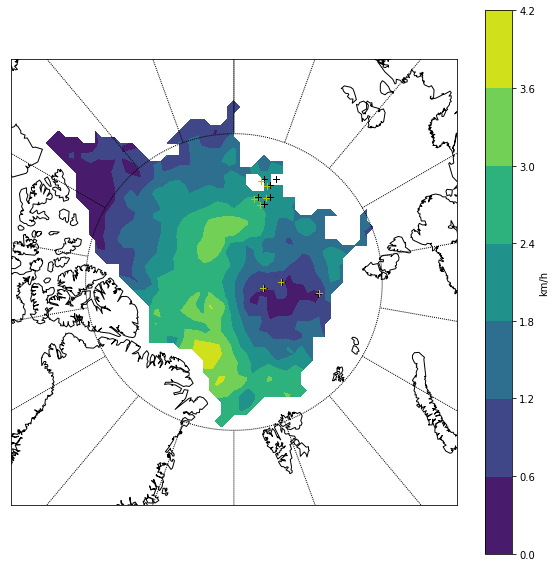

In [22]:
# plot start and end points

fig=plt.figure(figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l')
#m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()
#m.fillcontinents(color='0.1',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='lightblue')

lon_map,lat_map=m(lon_start[:,:],lat_start[:,:])
im=m.contourf(lon_map,lat_map,plotfield)

for i,val in enumerate(test_startlo):
    lon_map,lat_map=m(test_startlo,test_startla)
    m.plot(lon_map,lat_map,'k+')
    
    lon_map,lat_map=m(test_endlo,test_endla)
    m.plot(lon_map,lat_map,'y+')

cbar=plt.colorbar()
cbar.set_label('km/h')

plt.show()

#### do the actual computation

In [23]:
# updated once per hour, every day, 24/7
!wget https://swift.dkrz.de/v1/dkrz_0262ea1f00e34439850f3f1d71817205/SIDFEx_index/SIDFEx_targettable.txt

--2019-09-09 22:00:33--  https://swift.dkrz.de/v1/dkrz_0262ea1f00e34439850f3f1d71817205/SIDFEx_index/SIDFEx_targettable.txt
Auflösen des Hostnamens swift.dkrz.de (swift.dkrz.de)… 136.172.36.74, 136.172.36.75, 136.172.36.73
Verbindungsaufbau zu swift.dkrz.de (swift.dkrz.de)|136.172.36.74|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 3890 (3,8K) [text/plain]
Wird in »SIDFEx_targettable.txt.3« gespeichert.

SIDFEx_targettable. 100%[===================>]   3,80K  --.-KB/s    in 0,002s  

2019-09-09 22:00:33 (1,95 MB/s) - »SIDFEx_targettable.txt.3« gespeichert [3890/3890]



In [24]:
# skip header (20 rows), read first two columns separately as strings
fname='SIDFEx_targettable.txt'
#0:TargetID 
#1:Current_Target 
targets_ID=np.loadtxt(fname, skiprows=20, usecols=(0,1), dtype='string')
#2:Latest_Position_Year 0
#3:Latest_Position_DayOfYear 1
#4:Latest_Position_Lat 2
#5:Latest_Position_Lon 3
#6:Total_First_Year 4
#7:Total_First_DayOfYear 5
#8:SIDFEx_First_Year 6
#9:SIDFEx_First_DayOfYear 7
#10:SIDFEx_Last_Year 8
#11:SIDFEx_Last_DayOfYear 9
#12:Total_Last_Year 10
#13:Total_Last_DayOfYear 11
targets=np.loadtxt(fname, skiprows=20, usecols=(2,3,4,5,6,7,8,9,10,11,12,13))

In [105]:
# BuoyID              Year     Hour   Min     DOY     POS_DOY      Lat           Lon          BP         Ts       Ta

poslat=np.array([72.54045, 73.74480, 73.70138, 75.74371, 69.05740, 80.20440, 79.24860, 84.16620, \
                 74.54620, 72.39185, 71.83907, 84.18900, 80.93260, 86.33100, 81.43820, 84.12240, \
                 89.97849, 78.63360, 82.55300, 83.78700, 83.43040, 85., 84., 84., 86., 86.])
poslon=np.array([162.44145, 171.71580, -148.48599, -151.74365, -168.96540, -165.20620, -165.38980, \
                -129.51140, 167.05740, -149.58145, -144.31197, -166.08760, -162.75800, -157.63920, \
                -137.96280, -99.60780, -86.82324, -169.91300, 122.54200, 124.48000, 153.44240, \
                130., 120., 140., 120., 140.])
poslon[poslon<0]=poslon[poslon<0]+360.

#0  127317              2017     00     00     1.000     1.000     72.54045     162.44145     959.80     -2.23     -0.75
#1  300234060436000     2017     00     00     1.000     1.000     73.74480     171.71580     1011.20     -15.80
#2  300234063991680     2017     00     00     1.000     1.000     73.70138     -148.48599     1016.00     -6.59
#3  139939              2017     00     00     1.000     1.000     75.74371     -151.74365     1015.30     -4.41     -29.27
#4  300234063803010     2017     00     00     169.00 169.0000     69.05740     -168.96540     1011.40     6.27
#5  300234060834110     2017     02     00     1.083     1.083     80.20440     -165.20620     1019.50     -15.60
#6  300234060434550     2017     00     00     1.000     1.000     79.24860     -165.38980     1017.60     -19.00
#7  300234062738010     2017     00     00     1.000     1.000     84.16620     -129.51140     1025.50     -33.70
#8  300234060430010     2017     21     00     1.875     1.875     74.54620     167.05740     968.20     -5.80
#9  300234066711310     2018     20     30     88.854   88.854     72.39185     -149.58145     -4.10
#10 300234066713470     2018     19     02     89.793   89.793     71.83907     -144.31197     -0.01
#11 300234065495020     2018     23     00     153.958 153.958     84.18900     -166.08760     1018.30     1.80
#12 300234066036110     2018     03     00     167.125 167.125     80.93260     -162.75800     1018.60     1.70     3.10
#13 300234066030330     2018     17     00     166.708 166.625     86.33100     -157.63920     1019.90     0.60     7.60
#14 300234066030190     2018     17     00     166.708 166.625     81.43820     -137.96280     1021.50     0.50     4.80
#15 300234066031190     2018     17     00     166.708 166.625     84.12240     -99.60780     1017.00     0.70     4.90
#16 300234066830700     2018     04     00     112.167 112.167     89.97849     -86.82324
#17 300234062880820     2018     21     00     317.875 317.875     78.63360     -169.91300     1000.60     -2.00
#18 300234065801030     2018     00     00     290.000 290.000     82.55300     122.54200     995.50     -2.41
#19 300234065802030     2018     00     00     290.000 290.000     83.78700     124.48000     999.90     -4.83
#20 300234061872720     2018     00     00     290.000 290.000     83.43040     153.44240     1000.00     -6.04
#21 FIXED85N130E
#22 FIXED84N120E
#23 FIXED84N140E
#24 FIXED86N120E
#25 FIXED86N140E
buoynum=25
targets_ID[buoynum], start_dates[buoynum], targets[buoynum,7]

(array(['FIXED86N140E', 'TRUE'], dtype='|S15'), '2019-07-29 00:00:00', 210.0)

In [106]:
poslon.shape, poslat.shape

((26,), (26,))

In [107]:
# targets that are not active anymore:
targets_ID[targets_ID[:,1]=='FALSE']
# still alive
targets_ID[targets_ID[:,1]=='TRUE']

array([['300234063991680', 'TRUE'],
       ['300234065495020', 'TRUE'],
       ['300234066036110', 'TRUE'],
       ['300234066030330', 'TRUE'],
       ['300234066030190', 'TRUE'],
       ['300234066031190', 'TRUE'],
       ['300234062880820', 'TRUE'],
       ['300234065801030', 'TRUE'],
       ['300234065802030', 'TRUE'],
       ['300234061872720', 'TRUE'],
       ['FIXED85N130E', 'TRUE'],
       ['FIXED84N120E', 'TRUE'],
       ['FIXED84N140E', 'TRUE'],
       ['FIXED86N120E', 'TRUE'],
       ['FIXED86N140E', 'TRUE']], dtype='|S15')

In [108]:
SIDFEx_First_Year=np.array(targets[:,6],dtype='int')
SIDFEx_First_DayOfYear=targets[:,7]
start_dates=list()

In [109]:
for i,val in enumerate(SIDFEx_First_DayOfYear):
    dates=datetime.strptime(str(SIDFEx_First_Year[i])+"-01-01 00:00:00", "%Y-%m-%d %H:%M:%S") + timedelta(days=SIDFEx_First_DayOfYear[i]-1.)
    start_dates.append(dates.strftime("%Y-%m-%d %H:%M:%S"))

In [110]:
# how many days until the forcing runs out?

# convert datestring to datetime object
initialdate='2017-01-01 00:00:00'
#initialdate='2013-10-01 12:00:00'
thedate = datetime.strptime(initialdate, "%Y-%m-%d %H:%M:%S")

endofforcing='2019-09-04 12:00:00'
endoftime = datetime.strptime(endofforcing, "%Y-%m-%d %H:%M:%S")

delta=endoftime - thedate
delta.days

976

In [114]:
# config
initialdate='2017-01-01 12:00:00'
num_times=delta.days+1   # integrate for x ...
delta_t=86400 # ... days [seconds]
num_buoys=poslon.shape[0]
#start_dates=['2018-10-02 12:00:00','2018-10-03 12:00:00','2018-10-04 12:00:00','2018-10-05 12:00:00','2018-10-01 12:00:00','2018-10-01 12:00:00','2018-10-01 12:00:00','2018-10-01 12:00:00','2018-10-01 12:00:00']


                

# generate DataFrame that will be filled with positions
dates = [initialdate]
lons = np.zeros((1, num_buoys))*np.nan
lats = np.zeros((1, num_buoys))*np.nan
lons_df = pd.DataFrame(data=lons, index=dates)
lats_df = pd.DataFrame(data=lats, index=dates)

# set initial positions at initial date, 0..360, 0..90
lons_df.loc[initialdate] = poslon # np.arange(90.,110.,1.)
lats_df.loc[initialdate] = poslat # 86.*np.ones_like(np.arange(100.,120.,1.))
lons_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
2017-01-01 12:00:00,162.44145,171.7158,211.51401,208.25635,191.0346,194.7938,194.6102,230.4886,167.0574,210.41855,...,273.17676,190.087,122.542,124.48,153.4424,130.0,120.0,140.0,120.0,140.0


In [115]:
# initialize the objects
objects = Buoys(lons_df.loc[initialdate],lats_df.loc[initialdate],initialdate, start_dates)

In [116]:
# integrate objects forward in time
for i in np.arange(0,num_times):
    print 'This is loop #'+str(i)
    
    # test with constant U,V
    #LON,LAT=objects.trajectory(-1./3.6,0.0,delta_t=86400) # U,V in m/s; 1000/3600 is 1km/h
    
    # get sea ice velocity fields from data
    Ufield, Vfield = loaddate_ofOSISAF(objects.getdate(), hemisphere='nh')

    # evaluate velocity fields at buoy position (NN, could be interpolated as well)
    U,V=find_UV_atbuoy_pos(lon_start,lat_start, Ufield.flatten(),Vfield.flatten(), objects)
    
    # don't advect buoys when there is no ice
    fixed=np.logical_or(U.mask, V.mask)
    U[fixed]=0.
    V[fixed]=0.
    
    # advect buoys
    LON,LAT=objects.trajectory(U,V,delta_t=delta_t) # U,V in m/s, delta_t in seconds
    
    # append the date and the positions to data frame
    lons_df=lons_df.append(LON.rename(objects.getdate())) # ADD CURRENT TIME HERE
    lats_df=lats_df.append(LAT.rename(objects.getdate()))
    #lons_df=lons_df.append(pd.DataFrame(data=LON, index=[objects.getdate()])) # ADD CURRENT TIME HERE
    #lats_df=lats_df.append(pd.DataFrame(data=LAT, index=[objects.getdate()]))

This is loop #0
loading drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701011200-201701031200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #1
loading drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701021200-201701041200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #2
loading drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701031200-201701051200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #3
loading drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701041200-201701061200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #4
loading drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701051200-201701071200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #5
loading drift-

Update buoy positions. Integrate for 24.0 hours.
This is loop #44
loading drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702141200-201702161200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #45
loading drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702151200-201702171200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #46
loading drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702161200-201702181200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #47
loading drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702171200-201702191200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #48
loading drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702181200-201702201200.nc ...
Update buoy positions. In

Update buoy positions. Integrate for 24.0 hours.
This is loop #88
loading drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201703301200-201704011200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #89
loading drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201703311200-201704021200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #90
loading drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201704011200-201704031200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #91
loading drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201704021200-201704041200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #92
loading drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201704031200-201704051200.nc ...
Update buoy positions. In

Update buoy positions. Integrate for 24.0 hours.
This is loop #130
loading drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705111200-201705131200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #131
loading drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705121200-201705141200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #132
loading drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705131200-201705151200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #133
loading drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705141200-201705161200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #134
loading drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705151200-201705171200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #173
loading drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201706231200-201706251200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #174
loading drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201706241200-201706261200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #175
loading drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201706251200-201706271200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #176
loading drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201706261200-201706281200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #177
loading drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201706271200-201706291200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #217
loading drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708061200-201708081200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #218
loading drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708071200-201708091200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #219
loading drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708081200-201708101200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #220
loading drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708091200-201708111200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #221
loading drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708101200-201708121200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #261
loading drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709191200-201709211200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #262
loading drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709201200-201709221200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #263
loading drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709211200-201709231200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #264
loading drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709221200-201709241200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #265
loading drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709231200-201709251200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #303
loading drift-velocities/archive/ice/drift_lr/merged/2017/11/ice_drift_nh_polstere-625_multi-oi_201710311200-201711021200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #304
loading drift-velocities/archive/ice/drift_lr/merged/2017/11/ice_drift_nh_polstere-625_multi-oi_201711011200-201711031200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #305
loading drift-velocities/archive/ice/drift_lr/merged/2017/11/ice_drift_nh_polstere-625_multi-oi_201711021200-201711041200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #306
loading drift-velocities/archive/ice/drift_lr/merged/2017/11/ice_drift_nh_polstere-625_multi-oi_201711031200-201711051200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #307
loading drift-velocities/archive/ice/drift_lr/merged/2017/11/ice_drift_nh_polstere-625_multi-oi_201711041200-201711061200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #347
loading drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712141200-201712161200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #348
loading drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712151200-201712171200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #349
loading drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712161200-201712181200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #350
loading drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712171200-201712191200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #351
loading drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712181200-201712201200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #390
loading drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801261200-201801281200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #391
loading drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801271200-201801291200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #392
loading drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801281200-201801301200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #393
loading drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801291200-201801311200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #394
loading drift-velocities/archive/ice/drift_lr/merged/2018/02/ice_drift_nh_polstere-625_multi-oi_201801301200-201802011200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #432
loading drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803091200-201803111200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #433
loading drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803101200-201803121200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #434
loading drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803111200-201803131200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #435
loading drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803121200-201803141200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #436
loading drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803131200-201803151200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #476
loading drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804221200-201804241200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #477
loading drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804231200-201804251200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #478
loading drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804241200-201804261200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #479
loading drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804251200-201804271200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #480
loading drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804261200-201804281200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #519
loading drift-velocities/archive/ice/drift_lr/merged/2018/06/ice_drift_nh_polstere-625_multi-oi_201806041200-201806061200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #520
loading drift-velocities/archive/ice/drift_lr/merged/2018/06/ice_drift_nh_polstere-625_multi-oi_201806051200-201806071200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #521
loading drift-velocities/archive/ice/drift_lr/merged/2018/06/ice_drift_nh_polstere-625_multi-oi_201806061200-201806081200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #522
loading drift-velocities/archive/ice/drift_lr/merged/2018/06/ice_drift_nh_polstere-625_multi-oi_201806071200-201806091200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #523
loading drift-velocities/archive/ice/drift_lr/merged/2018/06/ice_drift_nh_polstere-625_multi-oi_201806081200-201806101200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #561
loading drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807161200-201807181200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #562
loading drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807171200-201807191200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #563
loading drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807181200-201807201200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #564
loading drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807191200-201807211200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #565
loading drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807201200-201807221200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #605
loading drift-velocities/archive/ice/drift_lr/merged/2018/08/ice_drift_nh_polstere-625_multi-oi_201808291200-201808311200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #606
loading drift-velocities/archive/ice/drift_lr/merged/2018/09/ice_drift_nh_polstere-625_multi-oi_201808301200-201809011200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #607
loading drift-velocities/archive/ice/drift_lr/merged/2018/09/ice_drift_nh_polstere-625_multi-oi_201808311200-201809021200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #608
loading drift-velocities/archive/ice/drift_lr/merged/2018/09/ice_drift_nh_polstere-625_multi-oi_201809011200-201809031200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #609
loading drift-velocities/archive/ice/drift_lr/merged/2018/09/ice_drift_nh_polstere-625_multi-oi_201809021200-201809041200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #648
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810111200-201810131200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #649
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810121200-201810141200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #650
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810131200-201810151200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #651
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810141200-201810161200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #652
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810151200-201810171200.nc ...
Update buoy position

loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811231200-201811251200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #692
loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811241200-201811261200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #693
loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811251200-201811271200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #694
loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811261200-201811281200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #695
loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811271200-201811291200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #696
loading drift-veloci

Update buoy positions. Integrate for 24.0 hours.
This is loop #735
loading drift-velocities/archive/ice/drift_lr/merged/2019/01/ice_drift_nh_polstere-625_multi-oi_201901061200-201901081200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #736
loading drift-velocities/archive/ice/drift_lr/merged/2019/01/ice_drift_nh_polstere-625_multi-oi_201901071200-201901091200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #737
loading drift-velocities/archive/ice/drift_lr/merged/2019/01/ice_drift_nh_polstere-625_multi-oi_201901081200-201901101200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #738
loading drift-velocities/archive/ice/drift_lr/merged/2019/01/ice_drift_nh_polstere-625_multi-oi_201901091200-201901111200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #739
loading drift-velocities/archive/ice/drift_lr/merged/2019/01/ice_drift_nh_polstere-625_multi-oi_201901101200-201901121200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #779
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902191200-201902211200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #780
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902201200-201902221200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #781
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902211200-201902231200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #782
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902221200-201902241200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #783
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902231200-201902251200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #821
loading drift-velocities/archive/ice/drift_lr/merged/2019/04/ice_drift_nh_polstere-625_multi-oi_201904021200-201904041200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #822
loading drift-velocities/archive/ice/drift_lr/merged/2019/04/ice_drift_nh_polstere-625_multi-oi_201904031200-201904051200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #823
loading drift-velocities/archive/ice/drift_lr/merged/2019/04/ice_drift_nh_polstere-625_multi-oi_201904041200-201904061200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #824
loading drift-velocities/archive/ice/drift_lr/merged/2019/04/ice_drift_nh_polstere-625_multi-oi_201904051200-201904071200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #825
loading drift-velocities/archive/ice/drift_lr/merged/2019/04/ice_drift_nh_polstere-625_multi-oi_201904061200-201904081200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #865
loading drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905161200-201905181200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #866
loading drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905171200-201905191200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #867
loading drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905181200-201905201200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #868
loading drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905191200-201905211200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #869
loading drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905201200-201905221200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #908
loading drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906281200-201906301200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #909
loading drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201906291200-201907011200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #910
loading drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201906301200-201907021200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #911
loading drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907011200-201907031200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #912
loading drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907021200-201907041200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #952
loading drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908111200-201908131200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #953
loading drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908121200-201908141200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #954
loading drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908131200-201908151200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #955
loading drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908141200-201908161200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #956
loading drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908151200-201908171200.nc ...
Update buoy position

In [117]:
idx=getindices_beforestart(initialdate, start_dates)
lons_df.loc[initialdate][idx] = np.nan # np.arange(90.,110.,1.)
lats_df.loc[initialdate][idx] = np.nan # 86.*np.ones_like(np.arange(100.,120.,1.))
lons_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
2017-01-01 12:00:00,162.441450,171.715800,211.514010,208.256350,NaN,194.793800,194.610200,230.488600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02 12:00:00,162.532730,171.876540,211.605699,208.374979,NaN,194.614352,194.655134,230.408407,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 12:00:00,162.776741,172.304583,211.983606,208.854723,NaN,194.685919,195.107421,230.165803,167.183809,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 12:00:00,163.062388,172.801941,212.522046,209.595360,NaN,195.268599,195.885608,229.755293,167.498505,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05 12:00:00,163.122109,173.121583,212.853826,210.142719,NaN,196.004048,196.627200,229.461740,167.764847,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06 12:00:00,162.975725,173.202985,213.017751,210.505048,NaN,196.595006,197.157082,229.615784,167.788157,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-07 12:00:00,162.966864,173.204171,213.190316,210.811024,NaN,196.835904,197.294493,229.992160,167.709117,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-08 12:00:00,163.059035,173.201837,213.250055,210.998752,NaN,197.077008,197.403856,230.279431,167.776986,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09 12:00:00,163.092370,173.201852,213.293544,211.193454,NaN,197.606990,197.816469,230.211930,167.919869,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10 12:00:00,163.304713,173.360301,213.490603,211.359356,NaN,198.050881,198.195895,229.863911,168.117957,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### plot the trajectories 

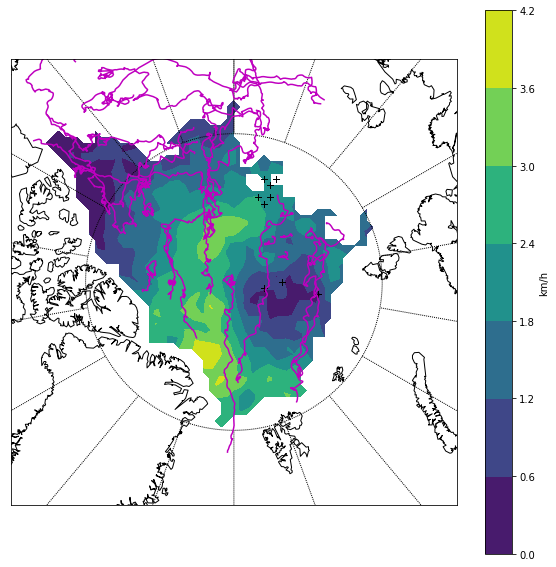

In [118]:
fig=plt.figure(figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l') # -180..180
#m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l') # -180..180
#m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')

m.drawcoastlines()
#m.fillcontinents(color='0.1',lake_color='lightblue')

# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='lightblue')

lon_map,lat_map=m(lon_start[:,:],lat_start[:,:])
m.contourf(lon_map,lat_map,plotfield)

# STARTING TEST POINTS
for i,val in enumerate(test_startlo):
    lon_map,lat_map=m(test_startlo,test_startla)
    m.plot(lon_map,lat_map,'k+')
    
    # END TEST POINTS (as given in OSISAF data)
    #lon_map,lat_map=m(test_endlo,test_endla)
    #m.plot(lon_map,lat_map,'y+')
    
# COMPUTED TRAJECTORY FROM Uice Vice
for buoynum in np.arange(0,num_buoys):
    a = np.ma.array(lons_df[buoynum][:].values, mask=np.isnan(lons_df[buoynum][:].values))
    b = np.ma.array(lats_df[buoynum][:].values, mask=np.isnan(lats_df[buoynum][:].values))
    lon_traj,lat_traj=m(a,b)
    m.plot(lon_traj, lat_traj,'m')
    

cbar=plt.colorbar()
cbar.set_label('km/h')
plt.show()

### export to SIDFEx format 

##### example header:

In [ ]:
SubmitYear: 2019
SubmitDayOfYear: 136.362
ProcessedYear: 2019
ProcessedDayOfYear: 136.375
### end of auto header
GroupID: awi001
MethodID: ClimRunVers2019May
TargetID: 300234066830700
InitYear: 2019
InitDayOfYear: 90
InitLat: 73.63310
InitLon: -8.17290
EnsMemNum: 010
### end of header
Year DayOfYear Lat Lon
2019  90  73.63310  -8.17290

##### fake a header for our trajectories

In [119]:
lons_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
2017-01-01 12:00:00,162.441450,171.715800,211.514010,208.256350,NaN,194.793800,194.610200,230.488600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02 12:00:00,162.532730,171.876540,211.605699,208.374979,NaN,194.614352,194.655134,230.408407,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 12:00:00,162.776741,172.304583,211.983606,208.854723,NaN,194.685919,195.107421,230.165803,167.183809,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 12:00:00,163.062388,172.801941,212.522046,209.595360,NaN,195.268599,195.885608,229.755293,167.498505,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05 12:00:00,163.122109,173.121583,212.853826,210.142719,NaN,196.004048,196.627200,229.461740,167.764847,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06 12:00:00,162.975725,173.202985,213.017751,210.505048,NaN,196.595006,197.157082,229.615784,167.788157,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-07 12:00:00,162.966864,173.204171,213.190316,210.811024,NaN,196.835904,197.294493,229.992160,167.709117,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-08 12:00:00,163.059035,173.201837,213.250055,210.998752,NaN,197.077008,197.403856,230.279431,167.776986,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09 12:00:00,163.092370,173.201852,213.293544,211.193454,NaN,197.606990,197.816469,230.211930,167.919869,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10 12:00:00,163.304713,173.360301,213.490603,211.359356,NaN,198.050881,198.195895,229.863911,168.117957,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [389]:
lats_df[TargetID][np.isfinite(lats_df[0].values)][0]

84.36373710832376

In [398]:
# CONTRIBUTION DETAILS
GroupID='mss001' # MOSAiC Summer School
MethodID='ClimRunOSISAF'

# SAVE FILES WITH TARGET ID, LOOP OVER TARGETS

TargetID=0 # will use this as column index in lons_df so far
EnsMemNum=1

# initial time of the trajectory; ignore initial NaNs
initialtime_traj=datetime.strptime(lons_df[0].index[np.isfinite(lons_df[0].values)][0], "%Y-%m-%d %H:%M:%S")
InitYear=initialtime_traj.year

# initial day of the trajectory (counted from beginning of the year)
begin_initializedyear=str(InitYear)+'-01-01 00:00:00'
# difference in fractional days
delta=initialtime_traj - datetime.strptime(begin_initializedyear, "%Y-%m-%d %H:%M:%S")
#fracdays=delta.total_seconds() / timedelta(days=1).total_seconds()
InitDayOfYear=delta.days + 1 # IABP convention

# intial position
InitLat=np.round(lats_df[TargetID][np.isfinite(lats_df[0].values)][0],5)
InitLon=np.round(lons_df[TargetID][np.isfinite(lons_df[0].values)][0],5)

# SUBMISSION DETAILS
# beginning of this year
initialdate='2019-01-01 00:00:00'
yearbegin = datetime.strptime(initialdate, "%Y-%m-%d %H:%M:%S")
# current time
now=datetime.now()
# difference in fractional days
delta=now - yearbegin
fracdays=delta.total_seconds() / timedelta(days=1).total_seconds() + 1 # IABP convention

# create the header of SIDFEx format
SubmitYear=now.year
SubmitDayOfYear=np.round(fracdays,3) #np.round(delta.days,3)
ProcessedYear=now.year
ProcessedDayOfYear=np.round(fracdays,3) #np.round(delta.days,3)

# fake auto header (usually done on DKRZ cloud)
autoheader= "SubmitYear: "+str(SubmitYear)+ \
        "\nSubmitDayOfYear: "+str(SubmitDayOfYear)+ \
        "\nProcessedYear: "+str(ProcessedYear)+ \
        "\nProcessedDayOfYear: "+str(ProcessedDayOfYear)+ \
        "\n### end of auto header"

#print autoheader

# main header
mainheader= "\nGroupID: "+GroupID+ \
        "\nMethodID: "+MethodID+ \
        "\nTargetID: "+str(TargetID)+ \
        "\nInitYear: "+str(InitYear)+ \
        "\nInitDayOfYear: "+str(InitDayOfYear)+ \
        "\nInitLat: "+str(InitLat)+ \
        "\nInitLon: "+str(InitLon)+ \
        "\nEnsMemNum: "+str(EnsMemNum).zfill(3)+ \
        "\n### end of header"
        

# Year DayOfYear Lat Lon
# 2019  90  73.63310  -8.17290
header=autoheader+mainheader+"\nYear DayOfYear Lat Lon"

print header

# main data here

# initialize X
length=lons_df[TargetID][np.isfinite(lons_df[TargetID].values)].shape[0]
X=np.zeros((length,4))

# fill with positions
X[:,2]=np.round(lats_df[TargetID][np.isfinite(lats_df[TargetID].values)],5)
X[:,3]=np.round(lons_df[TargetID][np.isfinite(lons_df[TargetID].values)],5)

# fill X with date information
for i,val in enumerate(lons_df[TargetID][np.isfinite(lons_df[TargetID].values)].index.tolist()):
    
    # fill X with year information
    date=datetime.strptime(val, "%Y-%m-%d %H:%M:%S")
    X[i,0]=date.year
    
    # fill X with day of year information
    begin_ofyear=str(date.year)+'-01-01 00:00:00'
    delta=date - datetime.strptime(begin_ofyear, "%Y-%m-%d %H:%M:%S")
    #fracdays=delta.total_seconds() / timedelta(days=1).total_seconds()
    X[i,1]=delta.days+1 # IABP convention
    
print X[0,:]

# save the file
np.savetxt(GroupID+'_'+MethodID+'_'+str(TargetID)+'_'+str(InitYear)+'-'+str(InitDayOfYear)+'_'+str(EnsMemNum).zfill(3)+'.txt',X, header=header, fmt='%i  %i  %f  %f', comments='')

SubmitYear: 2019
SubmitDayOfYear: 252.915
ProcessedYear: 2019
ProcessedDayOfYear: 252.915
### end of auto header
GroupID: mss001
MethodID: ClimRunOSISAF
TargetID: 0
InitYear: 2018
InitDayOfYear: 276
InitLat: 84.36374
InitLon: 159.12057
EnsMemNum: 001
### end of header
Year DayOfYear Lat Lon
[2018.       276.        84.36374  159.12057]


In [399]:
pwd

u'/Users/trackow/Documents/MOSAiC-Lecture/MOSAiC-School-ensemble'

In [401]:
GroupID+'_'+MethodID+'_'+str(TargetID)+'_'+str(InitYear)+'-'+str(InitDayOfYear)+'_'+str(EnsMemNum).zfill(3)+'.txt'

'mss001_ClimRunOSISAF_0_2018-276_001.txt'

In [402]:
less mss001_ClimRunOSISAF_0_2018-276_001.txt

- Parallel computing, sea ice age maps, Durchmischung, leads, Alleinstellungsmerkmal
- MOSAIC school ensemble machen fuer SiDFex?
- DWD forecast available, at ship position, get a file